Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Navigating to data dir

In [ ]:
import os
os.chdir("/content/drive/My Drive/NLP/NLP_math_research_project")

Importing required libraries

In [ ]:
import pandas as pd
import numpy as np

Reading data into dataframe

In [ ]:
math_problems = pd.read_csv("data_with_ner_pos_vocabcount.csv")

In [ ]:
math_problems.head()

,problem,level,no_of_equations,modified_problem,sentence_count,word_count,words_per_sentence,average_word_length,large_words,has_repeated_large_words,...,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X,math_vocab_count
0,A horse 24 feet from the center of a merry-go-...,Level 2,0,A horse 24 feet from the center of a merry-go-...,2,41,20,4,2,True,...,3,2,0,0,5,1,0,5,0,20
1,A math teacher requires Noelle to do one homew...,Level 5,4,A math teacher requires Noelle to do one homew...,3,100,33,4,9,True,...,6,7,9,1,12,3,0,13,0,46
2,"In a rectangular coordinate system, what is th...",Level 2,1,"In a rectangular coordinate system, what is th...",1,22,22,4,3,False,...,0,0,1,0,2,0,0,0,0,9
3,"If $x^2+y^2=1$, what is the largest possible v...",Level 5,2,"If , what is the largest possible value of ?",1,10,10,4,2,False,...,0,0,1,0,2,1,0,0,0,4
4,"If Alex gives Bob a penny, Bob will have three...",Level 4,0,"If Alex gives Bob a penny, Bob will have three...",3,45,15,4,2,True,...,1,0,0,9,5,5,0,7,0,26


Dropping unnecessary columns

In [ ]:
math_problems.drop(columns=["problem", "modified_problem", "math_vocab_count"], inplace=True)

Separating target attribute and input data

In [70]:
Y = math_problems["level"]
X = math_problems.drop(columns=['level'])

Dropping zero variance columns

In [71]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
X = selector.fit_transform(X)

In [72]:
input_features = math_problems.drop(columns=["level"]).columns

In [73]:
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names (column names)
selected_feature_names = [feature_name for i, feature_name in enumerate(input_features) if i in selected_feature_indices]

print(selected_feature_names)

['no_of_equations', 'sentence_count', 'word_count', 'words_per_sentence', 'average_word_length', 'large_words', 'has_repeated_large_words', 'CARDINAL', 'DATE', 'FAC', 'GPE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']


In [ ]:
print(len(math_problems.columns), len(X[0]))

44 38


Spectral clustering

In [74]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

results = []
silhouette_scores = []

# Apply spectral clustering
n_clusters_range = [2,3,4,5]
for n_clusters in n_clusters_range:
  spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
  labels = spectral_clustering.fit_predict(X)
  results.append(labels)
  score = silhouette_score(X, labels)
  silhouette_scores.append(score)

# Find the optimal number of clusters
optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_n_clusters)

Optimal number of clusters: 2


Visualize using t-SNe plot

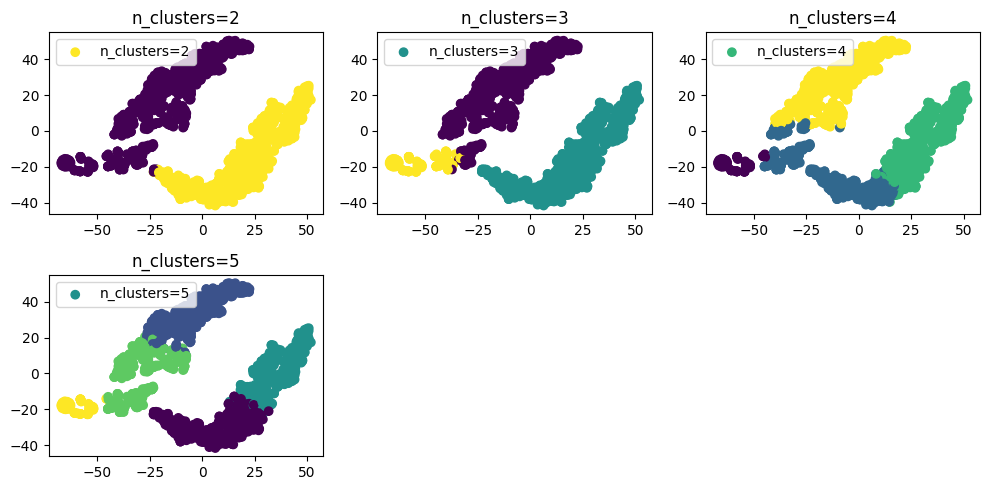

In [75]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Visualize t-SNE plot
plt.figure(figsize=(10, 5))
for i, labels in enumerate(results):
    tsne = TSNE(n_components=2, random_state=0)
    X_embedded = tsne.fit_transform(X)

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis', label=f'n_clusters={n_clusters_range[i]}')
    plt.title(f'n_clusters={n_clusters_range[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

Scree plot

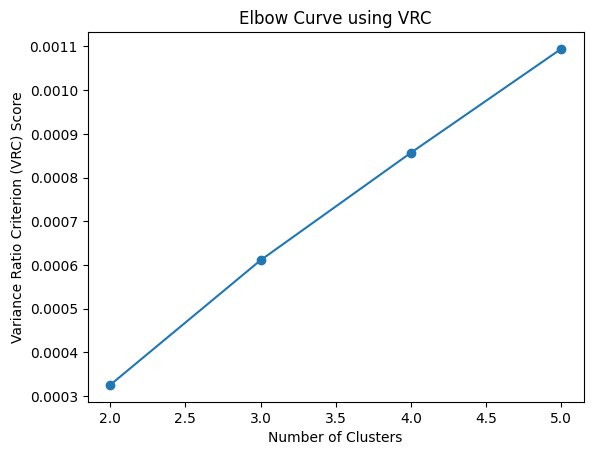

In [67]:
# Set the range of n_clusters values
n_clusters_range = range(2, 6)

# Compute VRC for each n_clusters value
vrc_scores = []
for n_clusters in n_clusters_range:
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    labels = spectral_clustering.fit_predict(X)
    cluster_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

    # Calculate between-cluster variance
    between_variance = np.sum(np.linalg.norm(cluster_centers - np.mean(X, axis=0))**2)

    # Calculate within-cluster variance
    within_variance = np.sum([np.sum(np.linalg.norm(X[labels == i] - cluster_centers[i])**2) for i in range(n_clusters)])

    # Calculate VRC score
    vrc = between_variance / within_variance
    vrc_scores.append(vrc)

# Plot the Elbow Curve
plt.plot(n_clusters_range, vrc_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Ratio Criterion (VRC) Score')
plt.title('Elbow Curve using VRC')
plt.show()